In [279]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [280]:
df = pd.read_csv("all_data.csv")
df.rename(columns = {"Life expectancy at birth (years)" : "Life_Expectancy"}, inplace = True)
df1 = df
print(df.head())

  Country  Year  Life_Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


Has life expectancy increased over time in the six nations?

    Almost all countries have had an increase in life expectancy

In [281]:
life_expectancy = df.groupby("Country")

<Figure size 432x288 with 0 Axes>

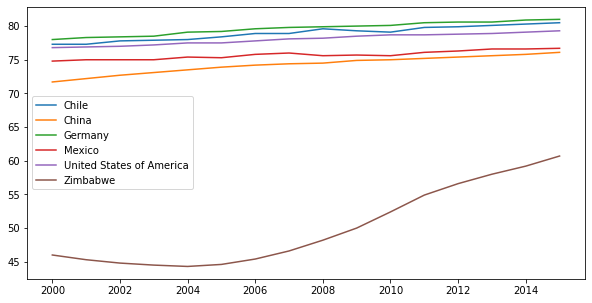

In [282]:
diccionario_life = {}
x_value_years = df.Year.unique()

plt.clf()
plt.figure(figsize= (10, 5))

for country, df in life_expectancy:
    plt.plot(x_value_years, df.Life_Expectancy, label = country)

plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

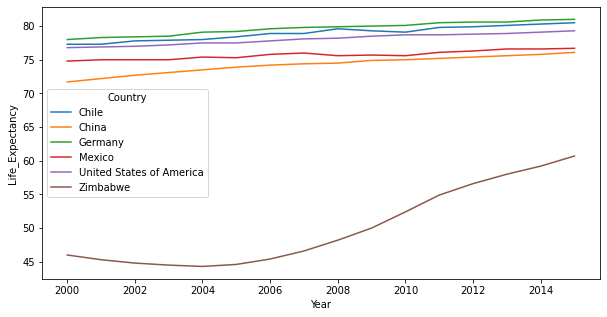

In [287]:
plt.clf()
df = df1
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.lineplot(data = df, x = "Year", y = "Life_Expectancy", hue = "Country")

Has GDP increased over time in the six nations?

    All nations have increased their GDP

<Figure size 432x288 with 0 Axes>

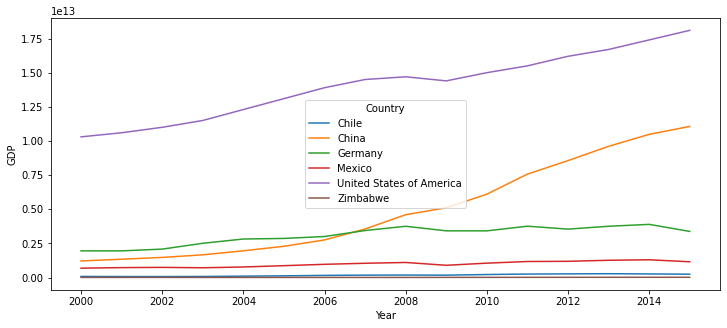

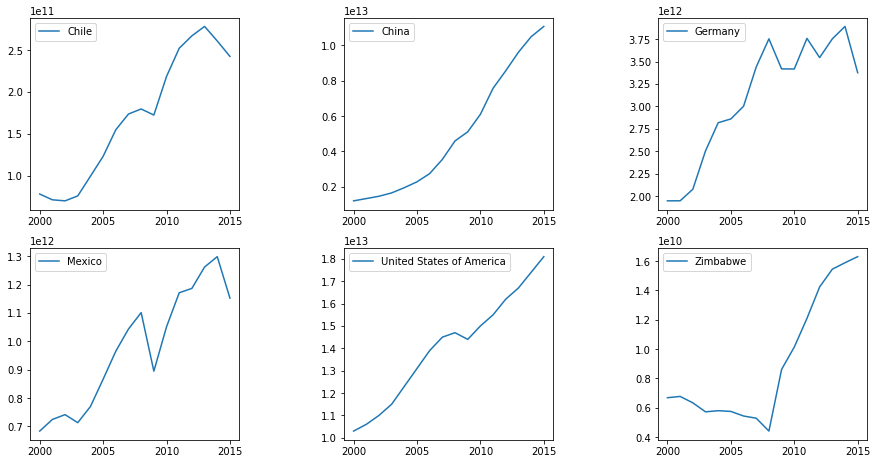

In [297]:
plt.clf()
f, ax = plt.subplots(figsize = (12, 5))
ax = sns.lineplot(data = df, x = "Year", y = "GDP", hue = "Country")
plt.show()


# Revisar cada pais y su avance en GDP
# for country in df.Country.unique():

unique_countries = df.Country.unique()

plt.figure(figsize = (15, 12))
for i in range(len(df.Country.unique())):
    plt.subplot(3 ,3, i + 1)
    country = unique_countries[i]
    country_gdp = df[df.Country == country]["GDP"]
    plt.plot(df.Year.unique(), country_gdp, label = country)
    plt.legend()


plt.subplots_adjust(wspace=0.5) 

Is there a correlation between GDP and life expectancy of a country?

    There is a strong positive correlation between GDP and life expectancy

<Figure size 432x288 with 0 Axes>

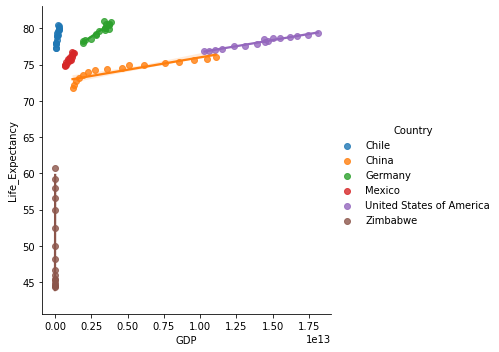

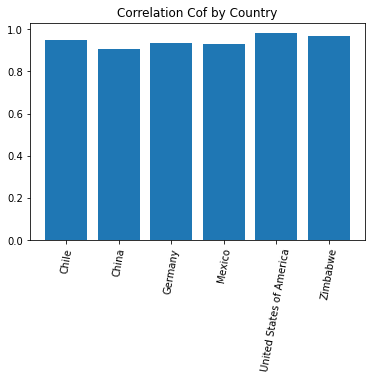

In [298]:
# print(df.head())

plt.clf()
sns.lmplot(data = df, x = "GDP", y = "Life_Expectancy", hue = "Country")
plt.show()

pearson_dict = {}
for country in df.Country.unique():
    country_gdp = df[df.Country == country]["GDP"]
    life_exp = df[df.Country == country]["Life_Expectancy"]
    corr, _ = pearsonr(country_gdp, life_exp)
    pearson_dict[country] = corr

plt.bar(pearson_dict.keys(), pearson_dict.values())
plt.xticks(rotation = 80)
plt.title("Correlation Cof by Country")
plt.show()

What is the average life expectancy in these nations?


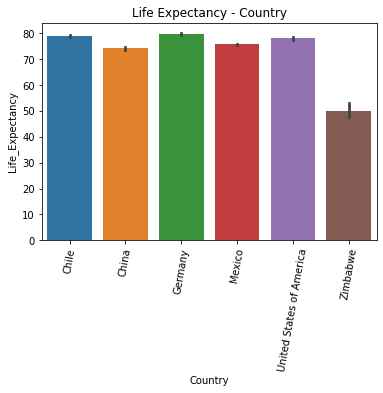

In [303]:
plt.clf()
sns.barplot(data = df, x = "Country", y = "Life_Expectancy")
plt.xticks(rotation = 80)
plt.title("Life Expectancy - Country")
plt.show()

In [304]:
print(df.head())

  Country  Year  Life_Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
